In [174]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import json
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display

sns.set_theme()
random_state = 42

In [175]:
all_models = ['LinearRegression','SVR','DecisionTreeRegressor','RandomForestRegressor','GradientBoostingRegressor','XGBRegressor','AdaBoostRegressor','LGBMRegressor','StackingRegressor','VotingRegressor']
combined_df = pd.read_csv("exp/LinearRegression.csv")
for model in all_models:
    df = pd.read_csv(f"exp/{model}.csv")
    combined_df = pd.concat([combined_df,df],axis = 0,ignore_index=True)

combined_df = combined_df.drop_duplicates()
combined_df['overfitting'] = combined_df['R2 Score(train)']/combined_df['R2 Score(test)']
combined_df = combined_df.drop('Params', axis=1)
combined_df.sort_values(by='R2 Score(test)',ascending=False)

,Model,FeatureSelection,Scaler,Number of features,Rmse,R2 Score(train),R2 Score(test),overfitting
35777,XGBRegressor,SFS,StandardScaler(),12,1.203045e+05,9.707928e-01,9.042633e-01,1.073573
35779,XGBRegressor,SFS,-,12,1.203045e+05,9.707928e-01,9.042633e-01,1.073573
35776,XGBRegressor,SFS,RobustScaler(),12,1.203045e+05,9.707928e-01,9.042633e-01,1.073573
35778,XGBRegressor,SFS,MinMaxScaler(),12,1.203045e+05,9.707928e-01,9.042633e-01,1.073573
42257,VotingRegressor,SFS,-,19,1.216260e+05,9.695641e-01,9.021484e-01,1.074728
...,...,...,...,...,...,...,...,...
987,SVR,VarianceThreshold,-,13,1.745761e+19,-2.333526e+27,-2.015973e+27,1.157518
943,SVR,VarianceThreshold,-,19,1.926696e+19,-2.843081e+27,-2.455508e+27,1.157838
988,SVR,-,-,22,4.806778e+19,-1.769710e+28,-1.528351e+28,1.157921
989,SVR,SelectKBest,-,16,5.003493e+19,-1.917328e+28,-1.656005e+28,1.157803


👑: **XGBoost**
* n_estimators = 200
* learning_rate = 0.3
* max_depth = 5
* Lambda = 3
* Alpha = 100

# Num

In [177]:
combined_df['Model'].value_counts()

Model
XGBRegressor                 31095
LGBMRegressor                 5002
DecisionTreeRegressor         1029
SVR                            901
RandomForestRegressor          495
GradientBoostingRegressor      405
AdaBoostRegressor              298
StackingRegressor              149
VotingRegressor                124
LinearRegression                50
Name: count, dtype: int64

# Best score

👉 **R2-Score**

In [178]:
combined_df = combined_df.loc[combined_df['R2 Score(test)'] >=0]
combined_df = combined_df.loc[combined_df['overfitting'] >=0.8]
combined_df.sort_values(by='R2 Score(test)',ascending=False)


,Model,FeatureSelection,Scaler,Number of features,Rmse,R2 Score(train),R2 Score(test),overfitting
35776,XGBRegressor,SFS,RobustScaler(),12,120304.455291,0.970793,0.904263,1.073573
35777,XGBRegressor,SFS,StandardScaler(),12,120304.455291,0.970793,0.904263,1.073573
35778,XGBRegressor,SFS,MinMaxScaler(),12,120304.455291,0.970793,0.904263,1.073573
35779,XGBRegressor,SFS,-,12,120304.455291,0.970793,0.904263,1.073573
42257,VotingRegressor,SFS,-,19,121626.026732,0.969564,0.902148,1.074728
...,...,...,...,...,...,...,...,...
5687,XGBRegressor,SelectKBest,StandardScaler(),7,387827.938919,0.006418,0.005068,1.266262
5688,XGBRegressor,SelectKBest,RobustScaler(),7,387827.938919,0.006418,0.005068,1.266262
5689,XGBRegressor,SFS,-,7,387827.938919,0.006418,0.005068,1.266262
5690,XGBRegressor,SFS,MinMaxScaler(),7,387827.938919,0.006418,0.005068,1.266262


In [179]:
best_R2_per_models = np.zeros(10)
for i in range(10):
    best_R2_per_models[i] = combined_df.loc[combined_df['Model']==all_models[i],'R2 Score(test)'].max()

In [180]:
ovf_by_best_score_models = np.zeros(10)
for i in range(10):
    ovf_by_best_score_models[i] = combined_df.loc[combined_df.loc[combined_df['Model']==all_models[i],
                                                                  'R2 Score(test)'].idxmax(),
                                                  'overfitting']

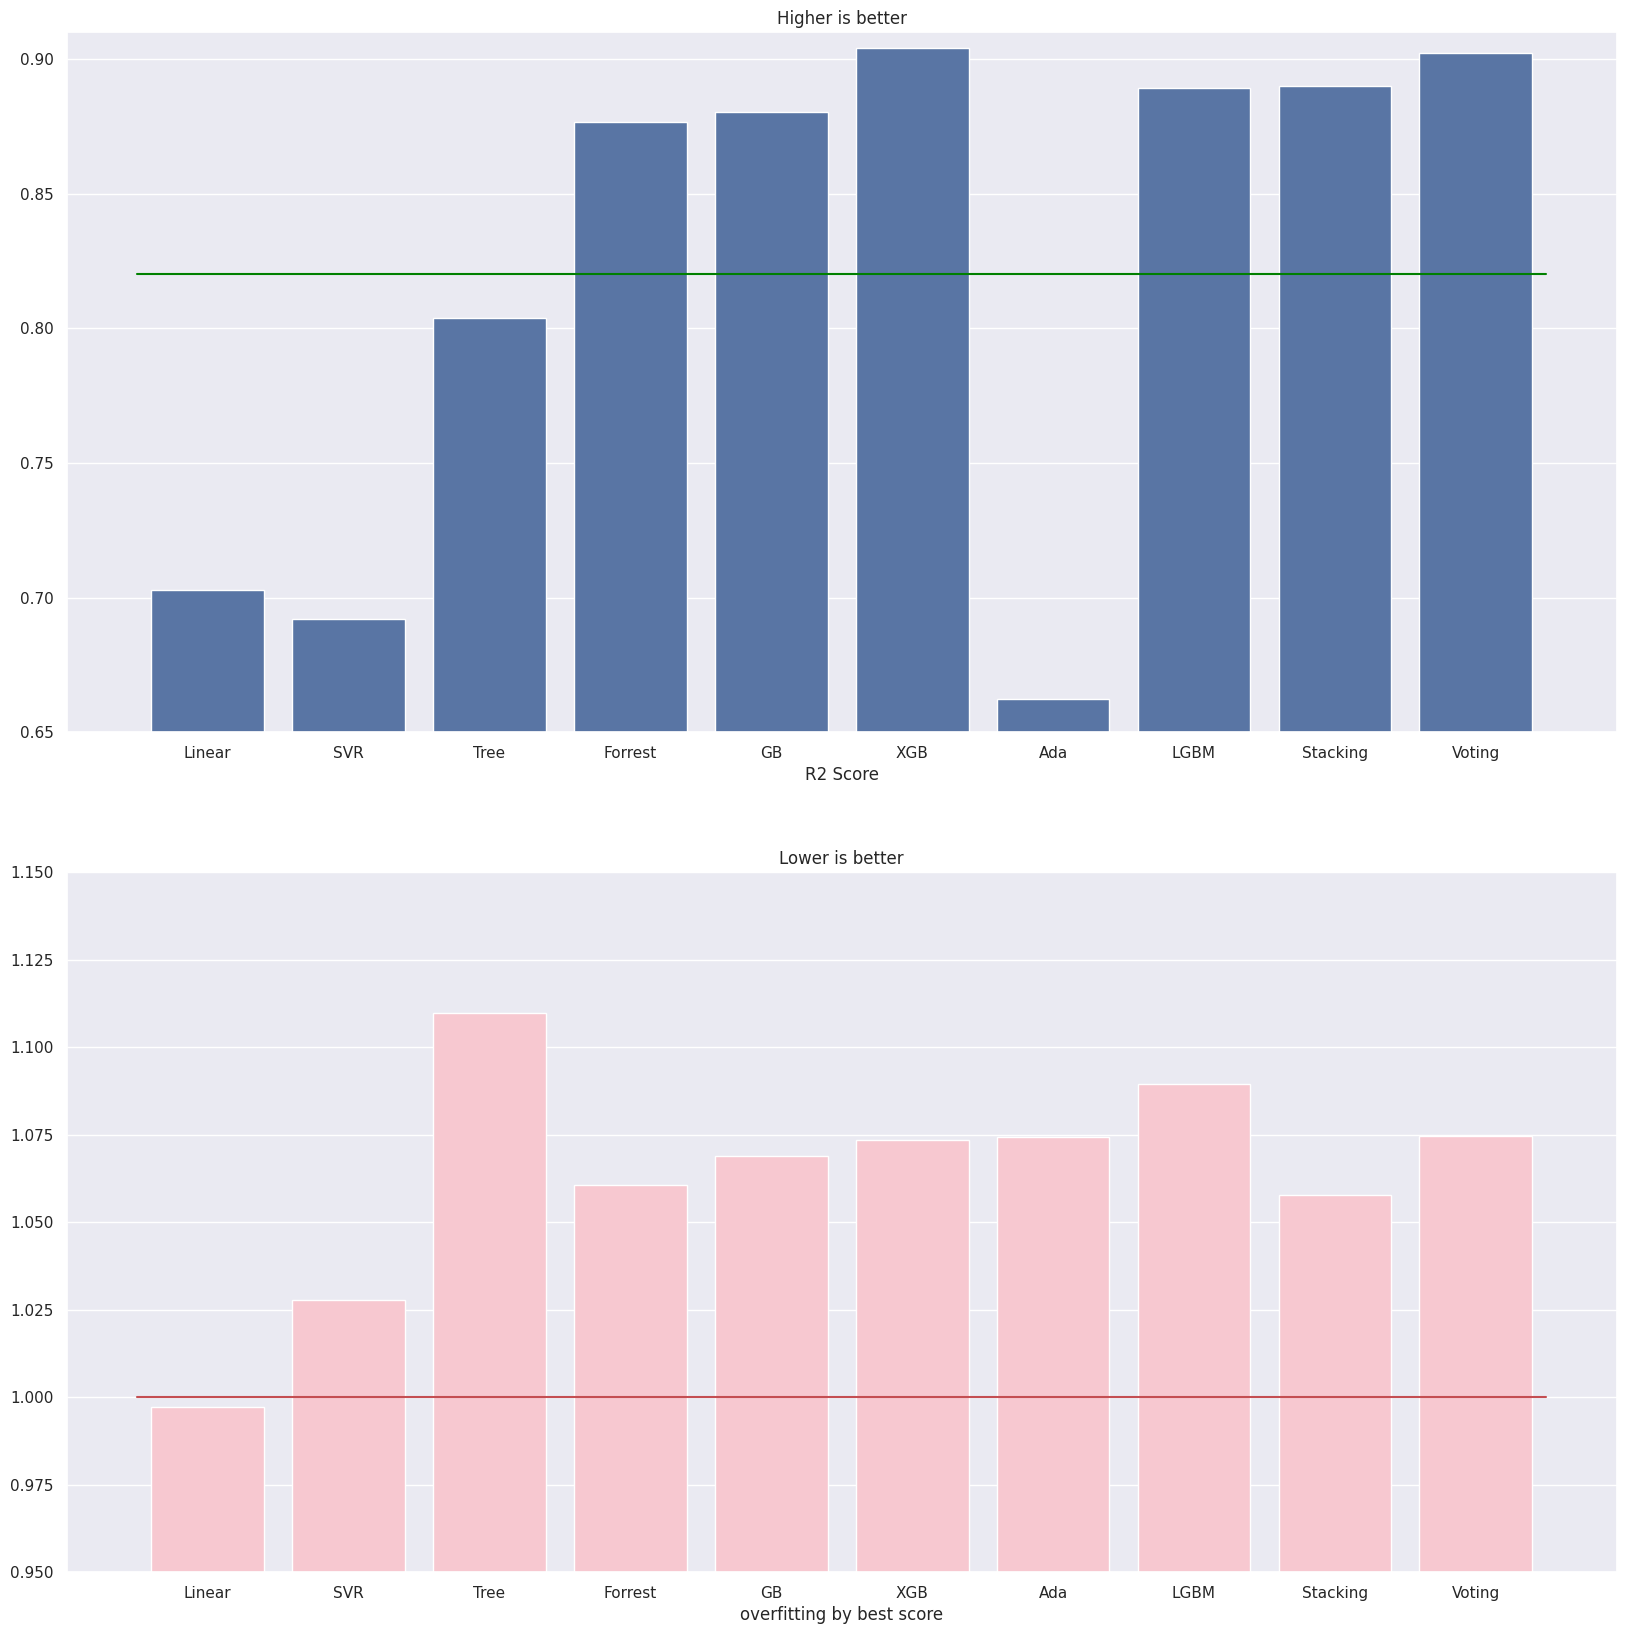

In [187]:
fig,(ax1,ax2) = plt.subplots(ncols=1,nrows=2,figsize=(20,20))
ax = sns.barplot(x=models,y=best_R2_per_models,ax=ax1)
ax = sns.lineplot(x=[-0.5,9.5],y=[best_R2_per_models.mean(),best_R2_per_models.mean()],ax=ax1,color='green')
ax1.set(xlabel='R2 Score',title='Higher is better',ylim=[0.65,0.91])

ax = sns.barplot(x=models,y=ovf_by_best_score_models,ax=ax2,color='pink')
ax = sns.lineplot(x=[-0.5,9.5],y=[1,1],ax=ax2,c='r',markers='-')
ax2.set(xlabel='overfitting by best score',title='Lower is better',ylim=[0.95,1.15]);

👑: **XGBoost, Voting**

*Voting at top 2 because of its ingredient is* **XGBoost**. *however, its overfitting decrease*

👉 **RMSE**

In [188]:
best_RMSE_per_models = np.zeros(10)
for i in range(10):
    best_RMSE_per_models[i] = combined_df.loc[combined_df['Model']==all_models[i],'Rmse'].min()

[Text(0.5, 0, 'RMSE'), Text(0.5, 1.0, 'Lower is better'), (100000.0, 250000.0)]

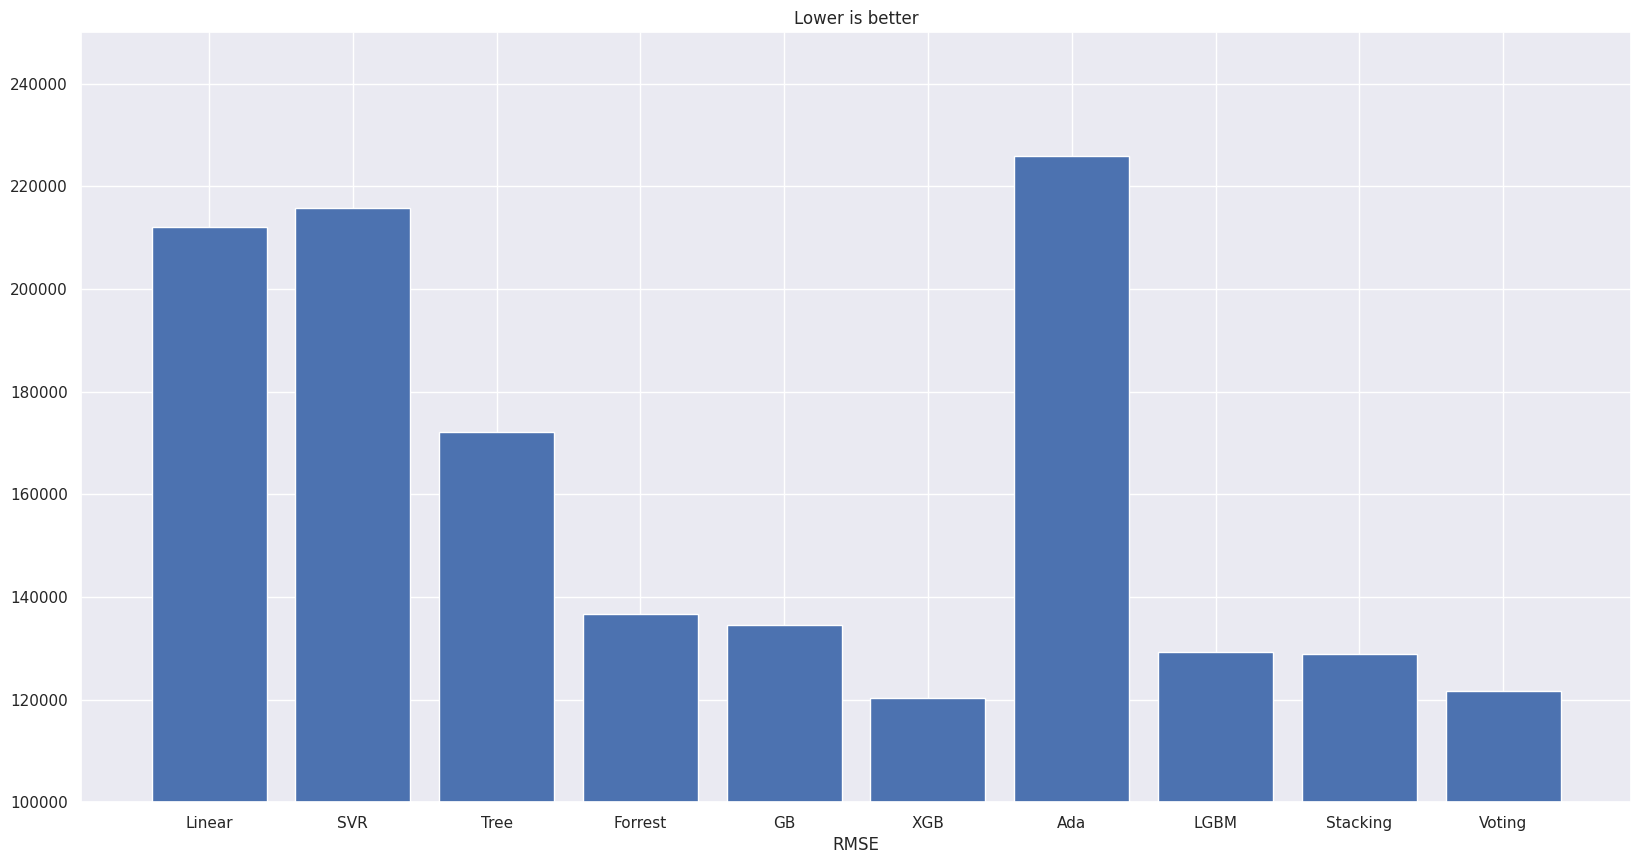

In [189]:
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(models,best_RMSE_per_models);
ax.set(xlabel='RMSE',title='Lower is better',ylim=[100000,250000])

👑: **XGBoost**

👉 **OVERFIT**

In [182]:
best_ovf_per_models = np.zeros(10)
for i in range(10):
    best_ovf_per_models[i] = combined_df.loc[combined_df['Model']==all_models[i],'overfitting'].min()

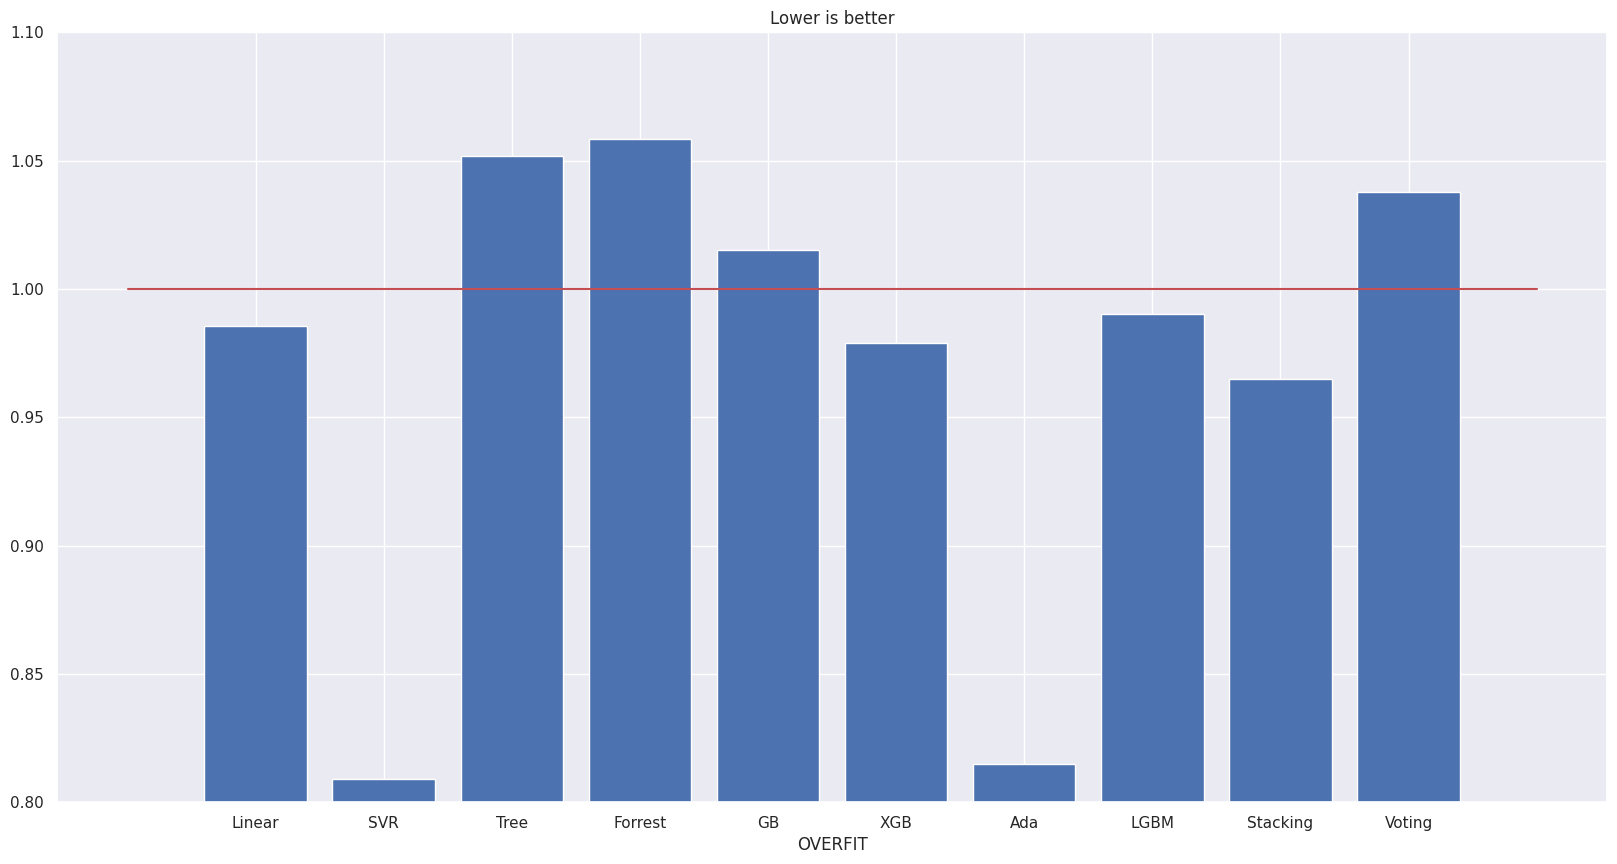

In [183]:
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(models,best_ovf_per_models)
ax.plot([-1,10],[1,1],c='r')
ax.set(xlabel='OVERFIT',title='Lower is better',ylim=[0.8,1.1]);

👑: **SVR, Ada** 

**Median**

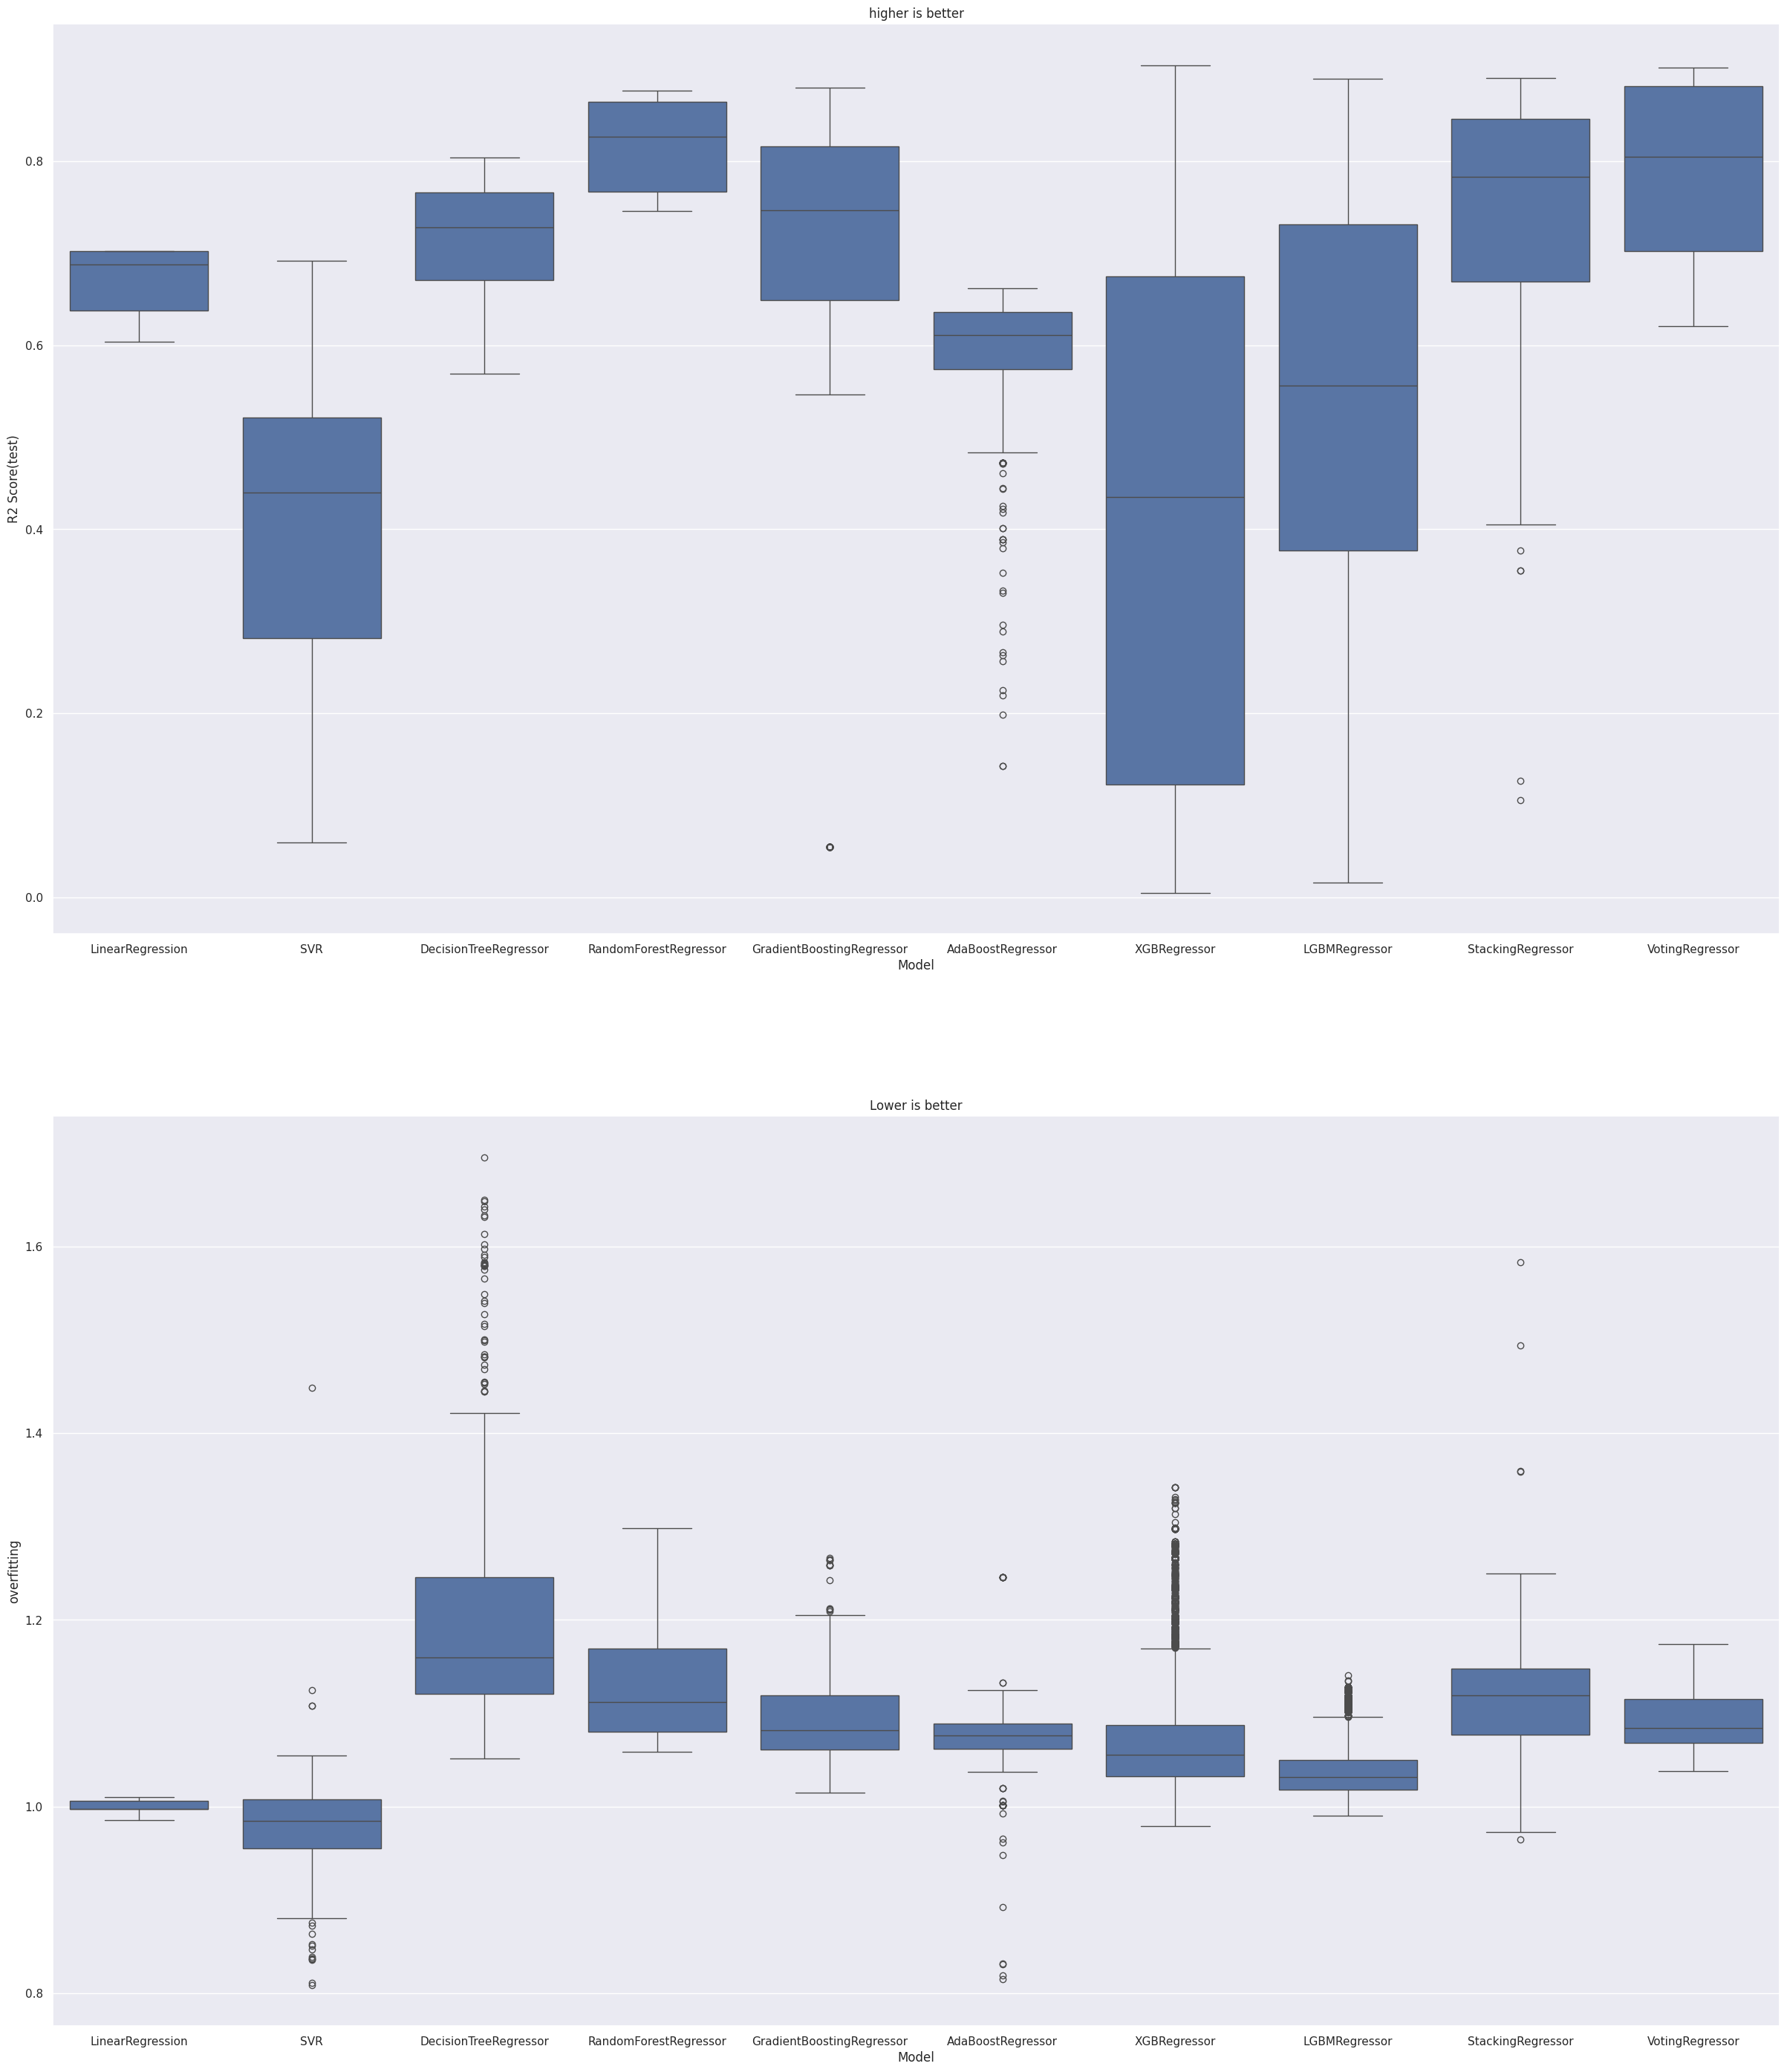

In [184]:
models = ['Linear','SVR','Tree','Forrest','GB','XGB','Ada','LGBM','Stacking','Voting']
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(30,35))
ax = sns.boxplot(data=combined_df,y='R2 Score(test)',x='Model',ax=ax1)
ax.set(title='higher is better');

ax = sns.boxplot(data=combined_df,y='overfitting',x='Model',ax=ax2)
ax.set(title='Lower is better');

# Variance

In [185]:
var_per_models = np.zeros(10)
for i in range(10):
    var_per_models[i] = combined_df.loc[combined_df['Model']==all_models[i],'R2 Score(test)'].var()

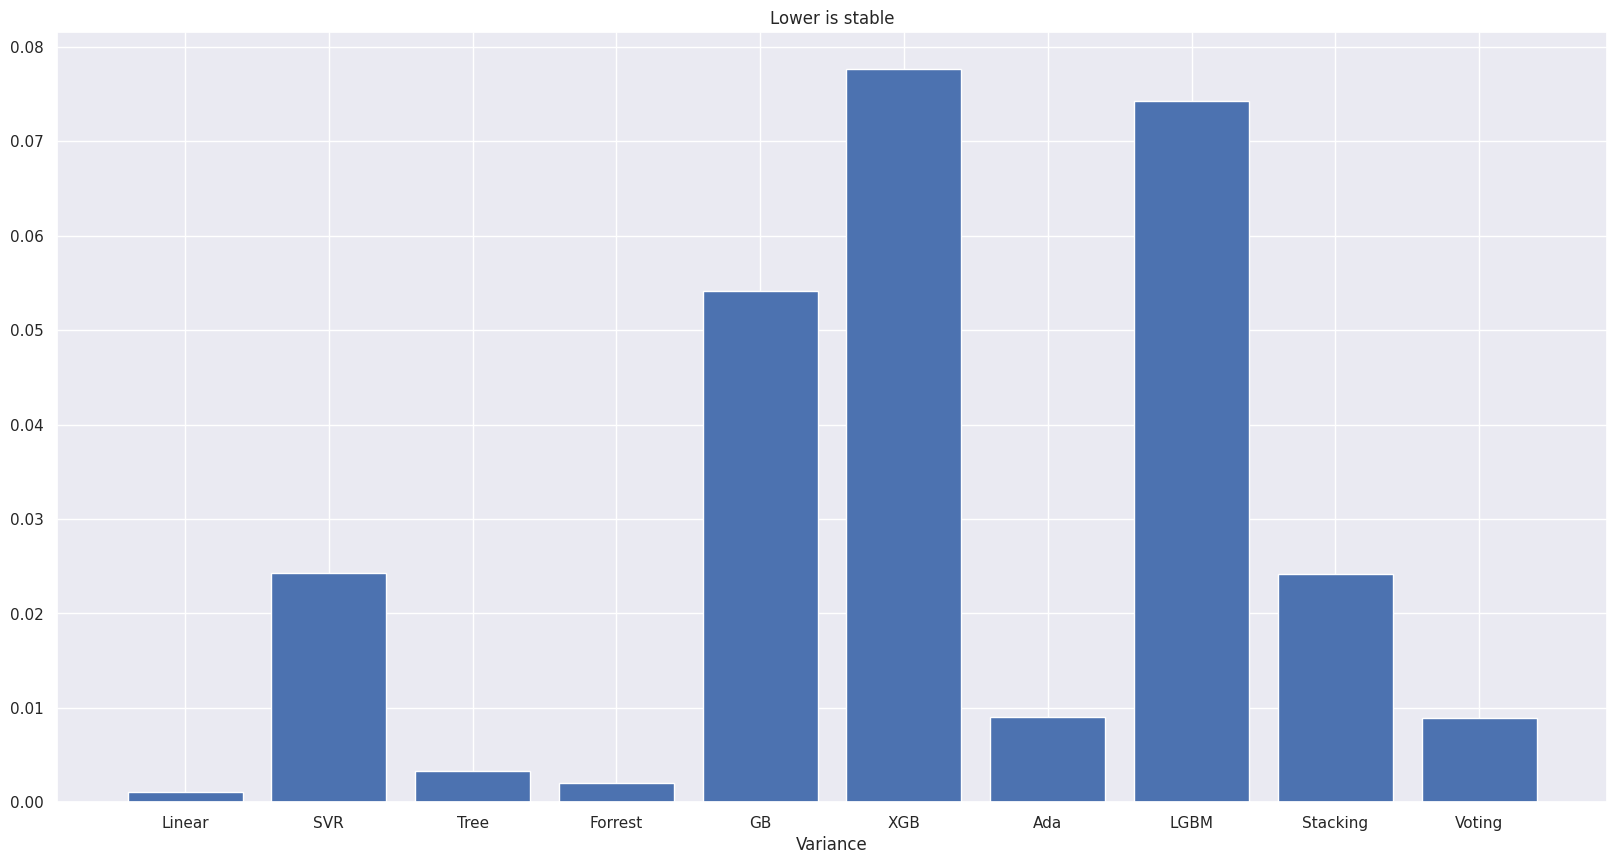

In [186]:
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(models,var_per_models);
ax.set(xlabel='Variance',title='Lower is stable');

👑: **Linear, Random Forrest** for best stable